**Natural Language Processing & Sentiment Analysis.**

NLP is a subfield in artificial intelligence (AI) that is concerned with the interaction of computers and human languages. We want to program algorithms that can understand and parse human languages. 
Many NLP problemd, including sentiment analysis, language translation, and text prediction are part of sequential problem analysis in Machine Learning. Sequential problems are a class of problem in machine learning in which the order of the features presented to the model is important for making predictions. 

For example, Let's consider the following text: 
* I was born in the United Kingdom, therefore I speak fluent ____________. 

Intuitively, we know that the word in the blank is probably the word English. The reason for this is that as we read the sentence, we process the words as a sequence. The sequence of the words captures the information required to make the prediction. By contrast, if we discard the sequential information and only consider the words individually, we get a bag of words, as below: 
(was), (United), (speak), (fluent), (I), (therefore), (born), (in), (the), (Kingdom). We can see that our ability to predict the word in the blank is now severely hampered. Without knowing the sequence of words, it is impossible to predict the word in the blank.

Many NLP problems are sequential problems, because the languages that we speak are sequential in nature, and the sequence conveys context and other subtle nuances. Sequential problems also occur naturally in time series prediction problems  where historical data is useful inorder to learn the behavior of the time series and predict the time series problem sometime into the future. 

Sentiment analysis is the prediction of the positivity of a text. Most sentiment analysis problems are classification problems (positive/neutral/negative).

**Why sentiment analysis is difficult**

Sentiment analysis faces many hurdles, due to the presence of subtle nuances in human languages. The same word can often covey a different meaning, depending on the context. Take for example the following two sentences:

* New York got bombed today at the concert.

* The EDM musician bombed the crowd at the New York Concert

We probably know that the sentiment of the first sentence is negative, as it probably means that the New York city sufferd a terrorist attack. On the other hand, we know that the sentiment of the second sentence is positive, since we know that the Electronic Dance Musician rocked the crowd at a New York concert following his/her concert and this is positive. The rule-based approach toward sentiment analysis suffers because of these subtle nuances, and it is incredibly complex to encode this knowledge in a rule-based manner.

Another reason sentiment analysis is difficult is because of sarcasm. Sarcasm is commonly used in many cultures, especially in an online medium. Sarcasm is difficult for computers to understand. In fact, even humans fail to detect sarcasm at times. Take for example the following sentence:

* Thanks for increasing my policy rate. What a good way to treat your long-term customer.

We can probably detect sarcasm in the preceding sentence, and come to the conclusion that the sentiment is negative. However, it is not easy for a program to understand that.

In this project, we'll analyze some movie reviews submitted in the IMDb movie reviews dataset. IMDb movie reviews dataset is a corpus of movie reviews posted on the popular movie reviews website https://www.imdb.com/. Each movie review has a label indicating whether the review is positive (1) or negative (0).

To work with such sequential data,we use the Recurrent Neural Network (RNN) and itsvariation, known as the long short-term memory (LSTM) network. Thesee neural networks needs to take in specific bits of the data at each time step, in the sequence that it appears. 

An RNN  high-level architecture, is as shown in the following diagram:
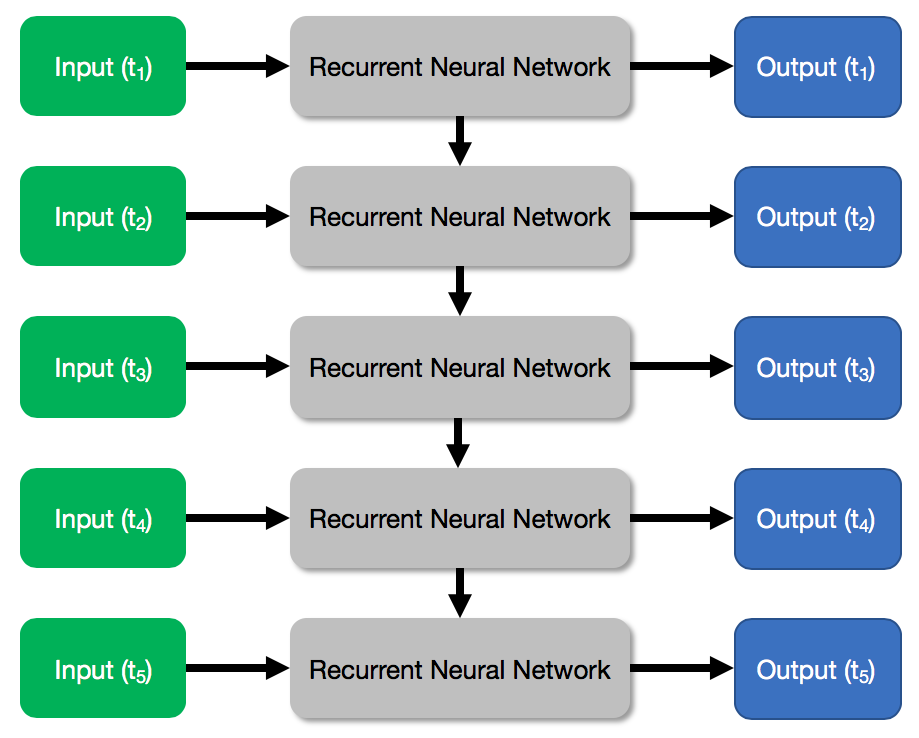

We can see that an RNN is a multi-layered neural network. We break up the raw input, splitting it into time steps. For example, if the raw input is a sentence, we can break up the sentence into individual words (in this case, every word represents a time step). Each word will then be provided in the corresponding layer in the RNN as Input. More importantly, each layer in an RNN passes its output to the next layer. The intermediate output passed from layer to layer is known as the hidden state. Essentially, the hidden state allows an RNN to maintain a memory of the intermediate states from the sequential data.


The following diagram depicts the mathematical function inside each layer of an RNN:
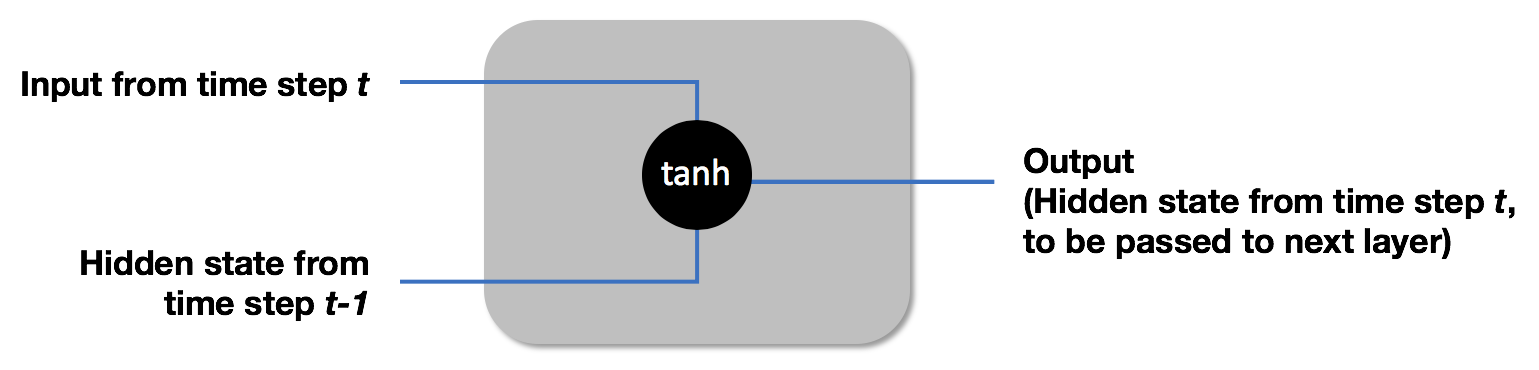
The mathematical function of an RNN is simple. Each layer t within an RNN has two inputs:

* The input from the time step t
* The hidden state passed from the previous layer t-1

Each layer in an RNN simply sums up the two inputs and applies a Hyperbolic Tangent (tanh) function to the sum. It then outputs the result, to be passed as a hidden state to the next layer.

The tanh function is the hyperbolic tangent function, and it simply squashes an input between 1 and -1. The tanh function is a good choice as a non-linear transformation of the combination of the current input and the previous hidden state, because it ensures that the weights don't diverge too rapidly. It has also other nice mathematical properties, such as being easily differentiable. 

Finally, to get the final output from the last layer in the RNN, we simply apply a sigmoid function to it.

The IMDb movie reviews dataset is provided in Keras, and we can import it by simply calling the following code:

In [1]:
import numpy as np
from keras.datasets import imdb
training_set, testing_set = imdb.load_data(index_from = 3)
X_train, y_train = training_set
X_test, y_test = testing_set
print(X_train[0])#the first movie review

Using TensorFlow backend.


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


We see a sequence of numbers, because Keras has already encoded the words as numbers as part of the preprocessing. 
We can convert the review back to words, using the built-in word-to-index dictionary provided by Keras as part of the dataset.

In [2]:
word_to_id = imdb.get_word_index()
word_to_id = {key:(value+3) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
id_to_word = {value:key for key,value in word_to_id.items()}

1646592/1641221 [==============================] - 0s 0us/step


Now, we can show the previous review in words:

In [3]:
print(' '.join(id_to_word[id] for id in X_train[0] ))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sho

Clearly, the sentiment of this review is positive. Let's make sure by printing its y value:

In [4]:
print(y_train[0])

1


RNNs have no problems with short-term dependencies (where the critical piece of information came just shortly before the final output). 
Unfortunately, RNNs do not work well with long-term dependency sequences (where is a significant gap between the critical time steps and the final output time step). RNNs have a good short-term memory, but a bad long-term memory. 

This is due to the the vanishing gradient problem when training neural networks using gradient-based methods such as backpropagation. The loss function in neural networks provides information on the accuracy of our predictions, and allows us to adjust the weights in each layer, to reduce the loss.However, as loss is propagated backwards, the loss tends to decrease with each successive layer.
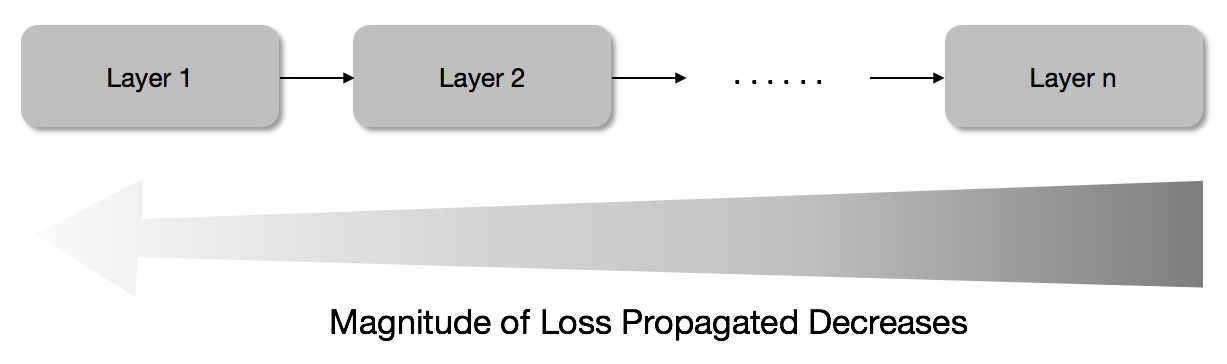

As a result, by the time the loss is propagated back toward the first few layers, the loss has already diminished so much that the weights do not change much at all. With such a small loss being propagated backward, it is impossible to adjust and train the weights of the first few layers. This phenomenon is known as the vanishing gradient problem in machine learning.

When it comes to sequential data and RNNs, the vanishing gradient can have a significant impact. The vanishing gradient problem means that RNNs are unable to learn from early layers (early time steps), which causes it to have poor long-term memory.

To address this problem, a variation of the RNN, known as the long short-term memory (LSTM) network was developed and it solves the long-term dependency problem faced by conventional RNNs. 

LSTMs were designed to overcome the problem with long-term dependencies. Let's assume we have this movie review:

* I **loved** the movie tonight. The action scence were **breathtaking** and the acting was **terrific. Highly recommended**.

Our task is to predict whether the reviewer liked the movie. As we read this review, we immediately understand that this review is positive. In particular, the emboldened words are the most important and informative and we can ignore the rest of the words.

By selectively remembering certain words, we can ensure that our neural network does not get bogged down by too many unnecessary words that do not provide much predictive power. This is an important distinction of LSTMs over conventional RNNs. Conventional RNNs have a tendency to remember everything (even unnecessary inputs) that results in the inability to learn from long sequences. By contrast, LSTMs selectively remember important inputs (such as the preceding text in bold), and this allows them to handle both short- and long-term dependencies.

**Representing Words as Vectors**

 Next, we represent words as input data for our neural network. The one-hot encoded representation suffers several drawbacks:
 
 (i) Since a word is reprented with a binary dummmy variable of 1 if it's present or 0 if otherwise, such a vector representation would be extremely sparse (full of zeros).This is because most words appear only once in each sentence/paragraph.It is difficult to train a neural network on such a sparse vector.
 
 (ii)  Secondly, such a vector representation does not take into consideration the similarity of words and therefore important information is lost when words are represented in this form 
 
Word embeddings overcome these disadvantages. Word embeddings are a learned form of vector representation for words. The main advantage of word embeddings is that they have fewer dimensions than the one-hot encoded representation, and they place similar words close to one another.

The word embedding layer takes in words as input, and then outputs a vector representation of these words. The vector representation should place similar words close to one another, and dissimilar words distant from one another. The word embedding layer learns this vector representation during training

They are trained using supervised learning algorithms. Keras provides a convenient API for training our own word embeddings. In this project, we will train our word embeddings on the IMDb movie reviews dataset.

In [5]:
# Importing data
training_set, testing_set = imdb.load_data(num_words = 10000)
X_train, y_train = training_set
X_test, y_test = testing_set

In [6]:
print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of testing samples = {}".format(X_test.shape[0]))

Number of training samples = 25000
Number of testing samples = 25000


Since the movie reviews have different lengths, and therefore the input vectors have different sizes.However, neural networks only accept fixed-size vectors.

To address this issue, we are going to define a **maxlen** parameter. The maxlen parameter shall be the maximum length of each movie review. Reviews that are longer than maxlen will be truncated, and reviews that are shorter than maxlen will be padded with zeros.

Using zero padding, we ensure that the input will have a fixed vector length.

In the Keras preprocessing module, there's a sequence class that allows us to perform preprocessing for sequential data.The sequence class has a pad_sequences function that allows us to perform zero padding on our sequential data. 

Let's truncate and pad our training and testing data using a maxlen of 100

In [7]:
from keras.preprocessing import sequence
X_train_padded = sequence.pad_sequences(X_train, maxlen= 100)
X_test_padded = sequence.pad_sequences(X_test, maxlen= 100)

Let's verify the vector length after zero padding:

In [10]:
print("X_train vector shape is {}".format(X_train_padded.shape))
print("X_test vector shape is {}".format(X_test_padded.shape))

X_train vector shape is (25000, 100)
X_test vector shape is (25000, 100)


The Sequential class allows us to stack layers on top of one another, making it really easy to build complex models layer by layer.We can then add the word embedding layer to our model. 

The word embedding layer can be constructed directly from the keras.layers as follows:

In [11]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Embedding
model.add(Embedding(input_dim = 10000, output_dim = 128))

Instructions for updating:
Colocations handled automatically by placer.


Similarly, we can add a LSTM layer directly from keras.layers.The LSTM class takes the following important arguments:

* units: This refers to the number of recurring units in the LSTM layer. A larger number of units results in a more complex model, at the expense of training time and overfitting. We'll use a typical value of 128 for the number of units.

* activation: This refers to the type of activation function applied to the cell state and the hidden state. The default value is the tanh function.

* recurrent_activation: This refers to the type of activation function applied to the forget, input, and output gates. The default value is the sigmoid function.

In [12]:
from keras.layers import LSTM
model.add(LSTM(units=128))

Finally, we add a Dense layer with sigmoid as the activation function.

The purpose of this layer is to ensure that the output of our model has a value between 0 and 1, representing the probability that the movie review is positive

In [13]:
from keras.layers import Dense
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


When compiling our model in Keras, there are certain parameters we need to decide. They are as follows:

* Loss function: We use a binary_crossentropy loss function when the target output is binary and a categorical_crossentropy loss function when the target output is multi-class. Since the sentiment of movie reviews in this project is binary (that is, positive or negative), we will use a binary_crossentropy loss function.

* Optimizer: It is often impossible to know beforehand which optimizer works better for the dataset because  certain optimizers may not work for certain datasets, due to the vanishing gradient and the exploding gradient problem  . Therefore, the best way to know is to train different models using different optimizers, and to use the optimizer that gives the best results. Let's try the SGD, RMSprop, and the adam optimizer.

In [16]:
#We define a train_model() function that takes in an Optimizer as an argument
def train_model(Optimizer, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Embedding(input_dim = 10000, output_dim = 128))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = Optimizer, 
                  metrics=['accuracy'])
    scores = model.fit(X_train, y_train, batch_size=128, 
                       epochs=10, 
                       validation_data=(X_val, y_val), 
                       verbose=0)
    return scores, model

 Let's train three different models using three different optimizers, the SGD, RMSprop, and the adam optimizer

In [17]:
SGD_score, SGD_model = train_model(Optimizer = 'sgd',
                                   X_train=X_train_padded, 
                                   y_train=y_train, 
                                   X_val=X_test_padded,
                                   y_val=y_test)

RMSprop_score, RMSprop_model = train_model(Optimizer = 'RMSprop',
                                           X_train=X_train_padded,
                                           y_train=y_train,
                                           X_val=X_test_padded,
                                           y_val=y_test)

Adam_score, Adam_model = train_model(Optimizer = 'adam',
                                     X_train=X_train_padded,
                                     y_train=y_train,
                                     X_val=X_test_padded,
                                     y_val=y_test)

Instructions for updating:
Use tf.cast instead.


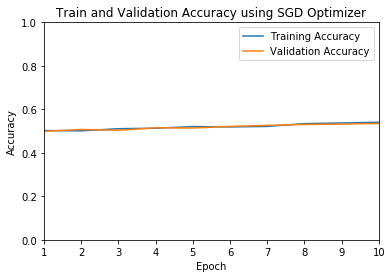

In [20]:
from matplotlib import pyplot as plt

plt.plot(range(1,11), SGD_score.history['acc'], label='Training Accuracy')
plt.plot(range(1,11), SGD_score.history['val_acc'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using SGD Optimizer')
plt.legend()
plt.show()

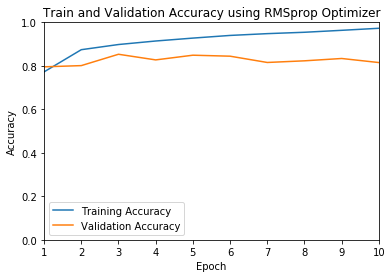

In [21]:
plt.plot(range(1,11), RMSprop_score.history['acc'], 
         label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_acc'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

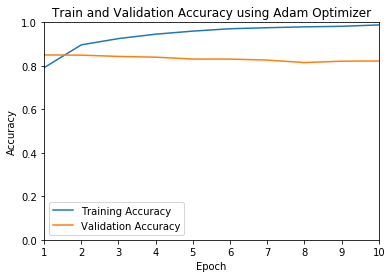

In [22]:
plt.plot(range(1,11), Adam_score.history['acc'], label='Training Accuracy')
plt.plot(range(1,11), Adam_score.history['val_acc'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.legend()
plt.show()

The RMSprop optimizer performs the best amongst the three. Within 10 epochs, our model is able to achieve a training accuracy of more than 95% and a validation accuracy of around 85%.

We then plot the  confusion matrix to evaluate the performance of our model using the confusion_matrix class from sklearn and using seaborn for visualization

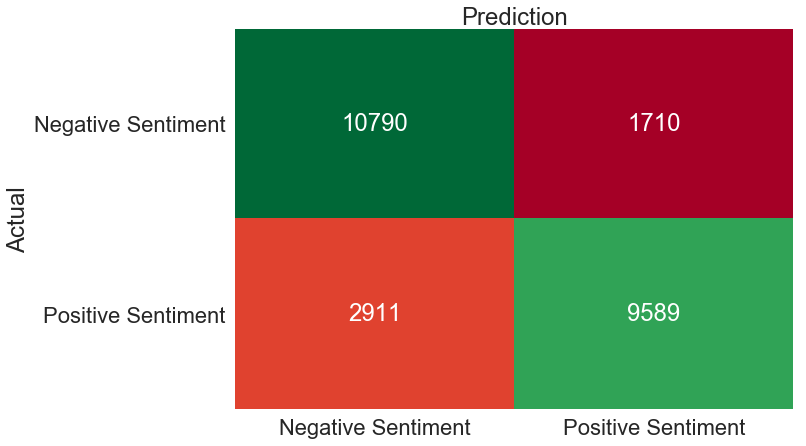

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10,7))
sns.set(font_scale=2)
y_test_pred = RMSprop_model.predict_classes(X_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 
                 'Positive Sentiment'], yticklabels=['Negative Sentiment', 
                 'Positive Sentiment'], cbar=False, cmap='RdYlGn', fmt='3.0f')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.xaxis.set_label_position('top')

We can see that most of the testing data was classified correctly, with the number of true negatives and true positives at around 85%. 

In other words, our model is 85% accurate at predicting sentiment for movie reviews.